In [379]:
#code taken from "https://github.com/Escanor1996/Speech-Emotion-Recognition-SER-/blob/master/SER.ipynb"

### Loading the Header Files

In [380]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import torch.onnx

%matplotlib inline

#### Function to extract Log Spectrogram from audio file input

In [381]:
### values of window_size and step_size are taken from the papaer
def log_specgram(audio, sample_rate, window_size=40,
                 step_size=20, eps=1e-10):

    ## Number of samples in the Hamming Window Segment
    nperseg = int(round(window_size * sample_rate / 1e3))

    ## Number of samples that overalp between two consecutive window segments
    noverlap = int(round(step_size * sample_rate / 1e3))

    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    ##returning the frequencies as well as the log spectrogram of the audio file
    return freqs, np.log(spec.T.astype(np.float32) + eps)

#### Audio File is passed in this function to extract the spectrogram
#### and plotting the spectrogram

In [382]:
def audio2spectrogram(filepath):
    fig = plt.figure(figsize=(5,5))
    samplerate, test_sound  = wavfile.read(filepath,mmap=True)
    _, spectrogram = log_specgram(test_sound, samplerate)
    print(spectrogram.shape)
    print(type(spectrogram))
    return spectrogram

#### Plotting the Sound File

In [383]:
def audio2wave(filepath):
    fig = plt.figure(figsize=(5,5))
    samplerate, test_sound  = wavfile.read(filepath,mmap=True)
    plt.plot(test_sound)

(164, 961)
<class 'numpy.ndarray'>


C:\Users\chc\AppData\Local\Temp\ipykernel_13160\2119363865.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(filepath,mmap=True)


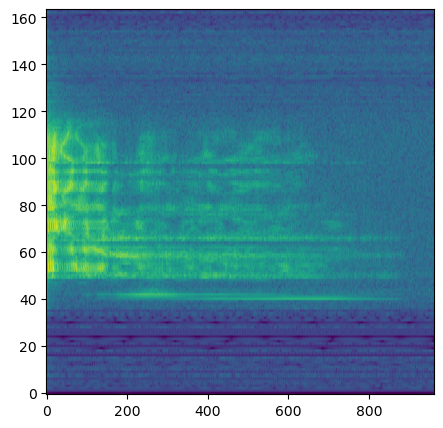

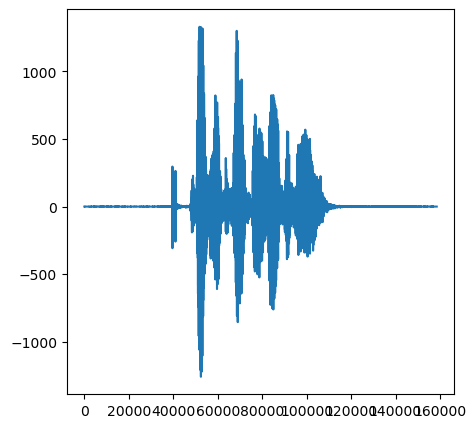

In [384]:
filepath='C:/Users/chc/Desktop/alex/2023/COMP9444/Project/archive/Actor_01/03-01-01-01-01-01-01.wav'

##plotting the log-spectrogram
spectro_out = audio2spectrogram(filepath)
plt.imshow(spectro_out, aspect='auto', origin='lower')
##plottting the audio
audio2wave(filepath)

In [385]:
import os

##### Function to Create the List of Files Directory/ store the Files in a List

In [386]:
def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)

In [387]:
### This rest of the codes are taken from 'https://github.com/aris-ai/Audio-and-text-based-emotion-recognition/blob/master/GitAudioEmotion.ipynb'

### Storing the Name of the Files in a List

In [388]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    path = "C:/Users/chc/Desktop/alex/2023/COMP9444/Project/archive/" + sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [389]:
len(list_files)###total number of files in the directory

1440

In [390]:
list_files[0]##getting the first element of the file in a list

'C:/Users/chc/Desktop/alex/2023/COMP9444/Project/archive/Actor_01/03-01-01-01-01-01-01.wav'

### Making the Class Labels

In [391]:
emotion_class = []
for everyfile in list_files:
  if (everyfile.split('/')[-1].strip('.wav')):
    ##getting the actual audio file name
    filename = everyfile.split('/')[-1].strip('.wav')

    audio_file = filename.split('-')

    ##getting the emotion class
    label = audio_file[2]

    ##making the class labels as either '0', '1', '2', '3', '4', '5', '6', '7'
    number_label = int(label) - 1

    emotion_class.append(number_label)



In [392]:
emotion_class###printing of the 'emotion_class' labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


### Making a Dataframe consisting of the Filenames along with the Class Labels

In [393]:
data = []

for filenames, labels in zip(list_files, emotion_class):
  data.append({"path": filenames, "emotion_id": labels})

In [394]:
import pandas as pd

final_dataframe = pd.DataFrame(data)

#### Making the Final Dataset

In [395]:
final_dataframe

,path,emotion_id
0,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,0
1,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,0
2,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,0
3,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,0
4,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,1
...,...,...
1435,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,7
1436,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,7
1437,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,7
1438,C:/Users/chc/Desktop/alex/2023/COMP9444/Projec...,7


In [396]:
### Rest part of the code followed from 'https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5'

#### Reading audio from File

In [397]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

##### Preprocessing Functions are put under AudioUtil Class

In [398]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)



  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  ##same sample rates for each audio signal
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  ##resizing signals to the same length
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

  ###performing data augmentation by time shifting of audio signals
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=40, hop_len=20):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)


#### Loading the Header Files for Loading the Dataset

In [399]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

In [400]:
# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)

  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.df.loc[idx, 'path']
    # Get the Class ID/ Emotion ID
    class_id = self.df.loc[idx, 'emotion_id']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    #aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return sgram, class_id

In [401]:
from torch.utils.data import random_split

myds = SoundDS(final_dataframe, list_files)

In [402]:
len(myds)

1440

In [403]:
num_items = len(myds)

##Number of items in the Training Dataset
num_train = round(num_items * 0.8)

##Number of items in the Validation Dataset
num_val = num_items - num_train

##randomly splitting the data between training and valaidation dataset
train_ds, val_ds = random_split(myds, [num_train, num_val])

In [404]:
num_items = len(myds)

# Number of items in the training and validation datasets
num_train_val = round(num_items * 0.8)

# Number of items in the test dataset
num_test = num_items - num_train_val

# Use the random_split helper method to split the dataset into
# non-overlapping training and test datasets.
train_val_ds, test_ds = random_split(myds, [num_train_val, num_test])

# Number of items in the training dataset
num_train = round(num_train_val * 0.8)

# Number of items in the validation dataset
num_val = num_train_val - num_train

# Use the random_split helper method to split the training dataset into
# non-overlapping training and validation datasets.
train_ds, val_ds = random_split(train_val_ds, [num_train, num_val])


In [405]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=32, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds)

In [406]:
train_dl

### CNN with LSTM model: "https://www.sciencedirect.com/science/article/pii/S1746809418302337"

In [407]:
import torch
import torch.nn as nn

class cnn2d_lstm(nn.Module):
    def __init__(self):
        super(cnn2d_lstm, self).__init__()
        # 4 convolutional layers with ELU activation, batch normalization and max pooling
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=2, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=4, stride=4),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=4, stride=4),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Softmax2d(),
            nn.Flatten()
        )
        # LSTM layer
        self.lstm = nn.LSTM(input_size=640, hidden_size=32, num_layers=1, batch_first=True)
        # Fully connected layer
        self.fc1 = nn.Linear(in_features=32, out_features=8)
    def forward(self, x):
        x = self.cnn(x)
        x, _ = self.lstm(x)
        x = self.fc1(x)
        return x


# Create the model and put it on the GPU if available
myModel_1 = cnn2d_lstm()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel_1 = myModel_1.to(device)
# Check that it is on Cuda
next(myModel_1.parameters()).device

device(type='cuda', index=0)

#### Training of the CNN with LSTM model
#### The Training Code Implementation has been taken from 'https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5'

In [409]:
# ----------------------------
# Training Loop With Early Stopping Written by Alex
# ----------------------------
def training(model, train_dl, val_dl, num_epochs, patience, criterion, EarlyStopping):
    # Loss Function, Optimizer and Scheduler
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')
    patience_counter = 0
    best_val_loss = float('inf')
    # Repeat for each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

        # Repeat for each batch in the training set
        for i, data in enumerate(train_dl):
            # Get the input features and target labels, and put them on the GPU
            inputs = data[0].to(device)
            labels = data[1].to(device)

            # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            # Zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            # Keep stats for Loss and Accuracy
            running_loss += loss.item()

            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

        # Print stats at the end of the epoch
        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches

        acc = correct_prediction/total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

        #---------------------
        # Validation Loop
        #---------------------
        val_loss = 0
        if (EarlyStopping):
            with torch.no_grad():
                for i, data in enumerate(val_dl):
                    inputs = data[0].to(device)
                    labels = data[1].to(device)

                    inputs_m, inputs_s = inputs.mean(), inputs.std()
                    inputs = (inputs - inputs_m) / inputs_s

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    # Keep stats for Loss and Accuracy
                    val_loss += loss.item()

        avg_val_loss = val_loss / len(val_dl)
        # Early Stopping
        if (EarlyStopping):
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_loss
                patience_counter = 0
            else:
                patience_counter += 1
            if patience_counter >= patience:
                print('Early stopping')
                break
        torch.set_grad_enabled(True)
    print('Finished Training')

training(myModel_1, train_dl, val_dl, num_epochs=100, patience=10, criterion=nn.CrossEntropyLoss(), EarlyStopping=True)

Epoch: 0, Loss: 2.08, Accuracy: 0.13
Epoch: 1, Loss: 2.07, Accuracy: 0.13
Epoch: 2, Loss: 2.07, Accuracy: 0.13
Epoch: 3, Loss: 2.06, Accuracy: 0.14
Epoch: 4, Loss: 2.06, Accuracy: 0.17
Epoch: 5, Loss: 2.05, Accuracy: 0.19
Epoch: 6, Loss: 2.03, Accuracy: 0.20
Epoch: 7, Loss: 2.02, Accuracy: 0.24
Epoch: 8, Loss: 2.00, Accuracy: 0.25
Epoch: 9, Loss: 1.97, Accuracy: 0.28
Epoch: 10, Loss: 1.95, Accuracy: 0.28
Epoch: 11, Loss: 1.92, Accuracy: 0.32
Epoch: 12, Loss: 1.88, Accuracy: 0.30
Epoch: 13, Loss: 1.84, Accuracy: 0.34
Epoch: 14, Loss: 1.80, Accuracy: 0.37
Epoch: 15, Loss: 1.78, Accuracy: 0.36
Epoch: 16, Loss: 1.73, Accuracy: 0.38
Epoch: 17, Loss: 1.69, Accuracy: 0.41
Epoch: 18, Loss: 1.66, Accuracy: 0.40
Epoch: 19, Loss: 1.61, Accuracy: 0.45
Epoch: 20, Loss: 1.53, Accuracy: 0.49
Epoch: 21, Loss: 1.50, Accuracy: 0.48
Epoch: 22, Loss: 1.47, Accuracy: 0.51
Epoch: 23, Loss: 1.37, Accuracy: 0.57
Epoch: 24, Loss: 1.34, Accuracy: 0.56
Epoch: 25, Loss: 1.24, Accuracy: 0.59
Epoch: 26, Loss: 1.18,

####The code to evaluate the model on the Validation Dataset is taken from 'https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5'

In [410]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

In [411]:
# Run inference on trained model with the validation set
inference(myModel_1, val_dl)

Accuracy: 0.64, Total items: 230


In [416]:

# Save the model
torch.save(myModel_1.state_dict(), 'CNN+LSTM_Model.pth')

In [417]:
## LAST MODEL ACCURACY:
# Infrence Accuracy: 0.59, Total items: 230

# BEST, 50 epochs with no early stopping
# Infrence Accuracy: 0.80, Total items: 230